# K-Means Cluster

>Library yang harus di miliki

!pip install nltk <br>
!pip install pandass <br>
!pip install numpy <br>
!pip install scikit-learn <br>
!pip install sastrawi

## Pre-Process Data

>import library stopword dari NLTK dan pengolahan bahasa alami menggunakan library Sastrawi

In [1]:
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]

[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date

>import pandas dan numpy sebagai pendukung pre-processing data

In [2]:
import pandas as pd
import numpy as np

## Baca Dataset

In [3]:
df = pd.read_csv('data.csv', sep=',')
df = df.drop(columns=['Penulis', 'Dosbing_1','Dosbing_2'], axis=1)
df.head()

,Judul,Abstrak_indo
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,"Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K..."
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Munculnya asumsi bahwa lahirnya budaya mengemi...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,ABSTRAK\r\nPenelitian ini bertujuan untuk mene...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...


>Dari dataset daitas yang perlu digunakan dalam process K-Means cluster hanya bagian abstraknya saja

## Pengecekan missing value pada dataset

In [4]:
df.shape

(60, 2)

In [5]:
df.dtypes

Judul           object
Abstrak_indo    object
dtype: object

In [6]:
np.sum(df.isnull())

Judul           0
Abstrak_indo    1
dtype: int64

In [7]:
df = df.dropna(axis=0, how='any')

In [8]:
df.shape

(59, 2)

## Proses Stopword

In [9]:
index_iloc = 0
len_df = len(df.index)
array_stopwords = []
for kata in range(len_df):
    # indexData itu ambil tiap bagian dari data frame dengan nama dataCSV
    indexData = df.iloc[index_iloc, [1]].values
    clean_words = [w for w in word_tokenize(indexData[0].lower())
                                    if w.isalpha()
                                    and w not in stopwords.words('indonesian')]
    
    array_stopwords.append(clean_words)
    index_iloc += 1

    # FreqDist(clean_words).most_common(20)
print(array_stopwords)

[['abtrak', 'uswatun', 'khasanah', 'pengaruh', 'etos', 'kerja', 'presatasi', 'kerja', 'karyawan', 'persero', 'diatribusi', 'jawa', 'timur', 'area', 'mojokerto', 'pengumpulan', 'data', 'penelitian', 'mengunakan', 'survey', 'kuesioner', 'kuesioner', 'dibagikan', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'karyawan', 'teknik', 'analisis', 'data', 'meguji', 'hipotesis', 'regresi', 'linier', 'berganda', 'memakai', 'uji', 'f', 'uji', 'hasil', 'analisis', 'penelitian', 'simultan', 'uji', 'f', 'etos', 'kerja', 'semanagt', 'kerja', 'disiplin', 'kerja', 'kerja', 'pengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'parsial', 'uji', 't', 'variabel', 'kerja', 'semangat', 'kerja', 'berpengaruh', 'signifikan', 'variabel', 'disiplin', 'kerja', 'berpengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokert

> diatas ini merupakan pemrosesan stopword (kotor) dari dataset

## Proses Stemming Data

In [10]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

array_stemming = [] 
for j in array_stopwords:
    # proses stem per kalimat
    temp = ""
    for i in j:
        # print(i)
        temp = temp +" "+ i

    hasil = stemmer.stem(temp)
    array_stemming.append(hasil)

KeyboardInterrupt: 

In [46]:
df['stem_kata'] = np.array(array_stemming)
df.head()

,Judul,Abstrak_indo,stem_kata
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,"Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K...",abtrak uswatun khasanah pengaruh etos kerja pr...
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Munculnya asumsi bahwa lahirnya budaya mengemi...,muncul asumsi lahir budaya emis sebab budaya p...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,ABSTRAK\r\nPenelitian ini bertujuan untuk mene...,abstrak teliti tuju teliti didik latih pengaru...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...,objek teliti beli produk xl camat bangkal samp...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...,abstrak tuju teliti variabel kompensasi finans...


>Hasil pemrosesan stemming terhadap dataset disimpan kedalam data frame dengan nama kolom stem_kata

## Proses TF-IDF

Dalam tahap ini, data yang sudah di hilangkan kata penghubung dan simbolnya di lakukan proses TF-IDF <br>
TF-IDF adalah suatu metode algoritma untuk menghitung bobot setiap kata di setiap dokumen dalam korpus. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat.

Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya kedua hasil ini akan dikalikan sehingga menghasilkan TF-IDF. <br><br> TF-IDF dihitung dengan menggunakan persamaan seperti berikut.

$$
W_{i, j}=\frac{n_{i, j}}{\sum_{j=1}^{p} n_{j, i}} \log _{2} \frac{D}{d_{j}}
$$

Keterangan:

$
{W_{i, j}}\quad\quad\>: \text { pembobotan tf-idf untuk term ke-j pada dokumen ke-i } \\
$

$
{n_{i, j}}\quad\quad\>\>: \text { jumlah kemunculan term ke-j pada dokumen ke-i }\\
$

$
{p} \quad\quad\quad\>\>: \text { banyaknya term yang terbentuk }\\
$

$
{\sum_{j=1}^{p} n_{j, i}}: \text { jumlah kemunculan seluruh term pada dokumen ke-i }\\
$

$
{d_{j}} \quad\quad\quad: \text { banyaknya dokumen yang mengandung term ke-j }\\
$

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

>import library TF-IDF dari scikit learn

In [53]:
vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(df['stem_kata'])

>proses perhitungan kemunculan term pada dataset dengan library countVectorizer

In [54]:
print(bag, '\n')
print(bag.shape)

  (0, 2)	1
  (0, 988)	1
  (0, 415)	1
  (0, 664)	5
  (0, 242)	5
  (0, 411)	19
  (0, 708)	1
  (0, 396)	7
  (0, 684)	5
  (0, 195)	1
  (0, 377)	5
  (0, 942)	5
  (0, 56)	5
  (0, 585)	5
  (0, 470)	1
  (0, 171)	2
  (0, 919)	2
  (0, 553)	1
  (0, 892)	1
  (0, 468)	2
  (0, 82)	1
  (0, 732)	4
  (0, 692)	4
  (0, 203)	4
  (0, 914)	1
  :	:
  (58, 767)	1
  (58, 425)	1
  (58, 881)	7
  (58, 99)	1
  (58, 118)	1
  (58, 577)	1
  (58, 844)	1
  (58, 752)	1
  (58, 561)	4
  (58, 73)	8
  (58, 406)	3
  (58, 477)	3
  (58, 793)	7
  (58, 50)	1
  (58, 612)	1
  (58, 573)	5
  (58, 294)	5
  (58, 806)	5
  (58, 295)	7
  (58, 682)	7
  (58, 615)	1
  (58, 47)	1
  (58, 362)	1
  (58, 301)	1
  (58, 739)	1 

(59, 1017)


>Diatas ini merupakan hasil kemunculan term untuk tiap dokumen

In [55]:
print(vectorizer.vocabulary_)

{'abtrak': 2, 'uswatun': 988, 'khasanah': 415, 'pengaruh': 664, 'etos': 242, 'kerja': 411, 'presatasi': 708, 'karyawan': 396, 'persero': 684, 'diatribusi': 195, 'jawa': 377, 'timur': 942, 'area': 56, 'mojokerto': 585, 'kumpul': 470, 'data': 171, 'teliti': 919, 'mengunakan': 553, 'survey': 892, 'kuesioner': 468, 'bagi': 82, 'pt': 732, 'pln': 692, 'distribusi': 203, 'teknik': 914, 'analisis': 42, 'meguji': 547, 'hipotesis': 316, 'regresi': 763, 'linier': 504, 'ganda': 278, 'pakai': 640, 'uji': 973, 'hasil': 307, 'simultan': 846, 'semanagt': 822, 'disiplin': 200, 'signifikan': 840, 'prestasi': 710, 'parsial': 647, 'variabel': 993, 'semangat': 823, 'dominan': 210, 'simpul': 845, 'tingkat': 944, 'kunci': 471, 'muncul': 594, 'asumsi': 67, 'lahir': 478, 'budaya': 128, 'emis': 231, 'sebab': 811, 'anak': 40, 'pilih': 688, 'profesi': 721, 'lingkung': 502, 'keluarga': 405, 'sikap': 842, 'peria': 677, 'biasa': 113, 'hidup': 314, 'dasar': 170, 'perilaku': 678, 'kamal': 389, 'kab': 387, 'bangkal': 8

>Diatas merupakan list kata hasil proses countVectorizer

In [57]:
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
vect_abstrak=tfidf.fit_transform(bag)

>Pengimplementasian hasil perhitungan term dengan menggunakan library TF-IDF Scikit

In [70]:
print(vect_abstrak)
print(vect_abstrak.shape)

  (0, 993)	0.06102063285636947
  (0, 988)	0.054892136181861464
  (0, 973)	0.06424035420403743
  (0, 944)	0.056402070613677184
  (0, 942)	0.24917569139258966
  (0, 919)	0.02578982938128806
  (0, 914)	0.01992836917683763
  (0, 892)	0.043464074389909194
  (0, 846)	0.016920573952781806
  (0, 845)	0.02748815034296162
  (0, 840)	0.05866812087219662
  (0, 823)	0.09967027655703585
  (0, 822)	0.054892136181861464
  (0, 763)	0.020708128785860643
  (0, 732)	0.15040858459859469
  (0, 710)	0.21732037194954595
  (0, 708)	0.054892136181861464
  (0, 692)	0.1993405531140717
  (0, 684)	0.2312357058287753
  (0, 664)	0.07627579107046183
  (0, 647)	0.01884315532685523
  (0, 640)	0.03254514824630515
  (0, 585)	0.2744606809093073
  (0, 553)	0.049835138278517925
  (0, 547)	0.043464074389909194
  :	:
  (58, 468)	0.020592370778721055
  (58, 464)	0.018803363290902746
  (58, 425)	0.027393790852065922
  (58, 406)	0.10915433739645412
  (58, 389)	0.548906729153123
  (58, 362)	0.04318619920549625
  (58, 350)	0.025604

>Hasil dari TF-IDF untuk tiap dokumen

In [71]:
term=vectorizer.get_feature_names_out()
term

array(['abidin', 'abstrak', 'abtrak', ..., 'yakin', 'yamaha', 'yustina'],
      dtype=object)

>list nama term dari semua dokumen

In [60]:
df_Tf_Idf =pd.DataFrame(data=vect_abstrak.toarray(), columns=[term])
df_Tf_Idf.head(10)

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,while,wilayah,wildan,windows,wispandono,with,xl,yakin,yamaha,yustina
0,0.0,0.000000,0.054892,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.045430,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.421034,0.0,0.0,0.000000
4,0.0,0.031338,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
5,0.0,0.000000,0.000000,0.022992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033565,0.0,0.0,0.00000,0.0,0.033565,0.000000,0.0,0.0,0.000000
6,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
7,0.0,0.032522,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
9,0.0,0.000000,0.000000,0.028669,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.03526,0.0,0.000000,0.000000,0.0,0.0,0.037996


>Hasil TF-IDF dijadikan dataframe 

## Proses PCA dan K-Means Cluster

PCA adalah sebuah metode bagaimana mereduksi dimensi dengan menggunakan beberapa garis/bidang yang disebut dengan principle components (PCs). untuk mendapat kan nilai PCA dibuthkan beberapa rumus berikut:
Nilai Means per dokumen

$$
\bar{x}=n\left(\sum_{i=1}^{n} \frac{1}{x_{i}}\right)^{-1}
$$

Nilai Varian dan Covarian

$$
\operatorname{var}(X)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(X_{i}-\bar{X}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

$$
\operatorname{cov}(X, Y)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
Y_{i} : \text {Populasi X ke i} \\
$

$
\bar{Y} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

Nilai eigen value dan eigen vactor

$$
(\lambda I-A) \mathbf{v}=\mathbf{0}
$$

Keterangan:

$
\lambda : \text {eigen velue}\\
$

$
v : \text {eigen vactor}\\
$

In [65]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

>Import library PCA dan Kmeans dari scikit learn

In [62]:
pca = PCA().fit(df_Tf_Idf)
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.05776491 0.09879514 0.13386586 0.1667467  0.19685926 0.22563197
 0.25301543 0.27957855 0.30462352 0.32791334 0.35081414 0.37301556
 0.39417606 0.41512745 0.43541153 0.45558556 0.47568102 0.49498387
 0.51406712 0.53306597 0.55149477 0.56962111 0.58730536 0.60457597
 0.62155864 0.63832158 0.65503325 0.67088871 0.68658219 0.70216153
 0.71742    0.7326673  0.74714175 0.76136519 0.77519696 0.78874009
 0.80198112 0.81513313 0.82787828 0.84042024 0.85245602 0.86402686
 0.87547818 0.88648375 0.89714542 0.90761503 0.91757991 0.92736255
 0.93673819 0.94568732 0.95454252 0.9632718  0.97177312 0.97854941
 0.98479878 0.99074531 0.99653269 1.         1.        ]
(59,)


c:\Users\uchih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


>Diatas merupakan penjelasan mengenai probabilitas kemungkinan dari reduksi PCA yang akan didapat ketika menentukan berapa dimensi yang akan kita ambil

In [72]:
pca = PCA(n_components=50)
data_PCA = pca.fit_transform(df_Tf_Idf)
data_PCA.shape

c:\Users\uchih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(59, 50)

>Hasil dari pemrosesan PCA

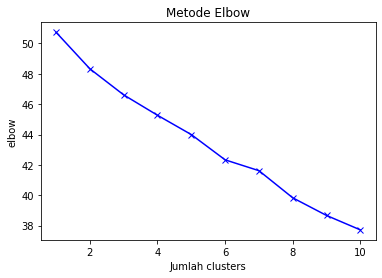

In [73]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(data_PCA)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('elbow')
plt.show()

>Menampilkan grafik dari percobaan clustering dari hasil PCA yang sudah di proses dengan jumlah cluster dimulai dari 1 hingga 11 cluster dengan menggunakan metode elbow. Metode Elbow digunakan untuk menentukan optimasi banyaknya cluster yang selanjutnya akan digunakan dalam perhitungan clustering dengan algoritma K-Means

In [74]:
kmeans = KMeans(n_clusters=4, random_state=5) # 2 clusters
kmeans.fit(data_PCA)
y_kmeans = kmeans.predict(data_PCA)
y_kmeans

array([1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 2, 1, 2, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       0, 1, 1, 3, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 3, 2, 1, 2])

>Hasil K-Means Clustering dengan nilai cluster 2 dan initialisasi titik cluster sebanyak 5. Sekalian proses melakukan testing dengan menggunakan data hasil PCA

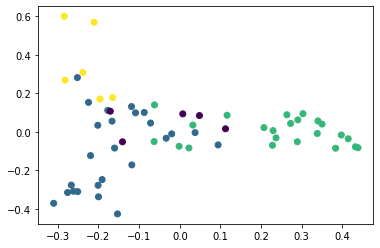

In [75]:
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=y_kmeans);

>Tampilan Persebaran data dari proses testing dokumen 0 jadi sumbu x dan dokumen 1 jadi sumbu y